In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TensorFlow version: 2.15.0
GPU is NOT AVAILABLE


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:34<00:00, 155MB/s]
100% 2.70G/2.70G [00:34<00:00, 85.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Loading image model
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
# Building convolution layers
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(units=1500, activation='relu'))

In [ ]:
model.add(Dropout(0.40))

In [ ]:
# output layer
model.add(Dense(units=38, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                   

In [ ]:
trained_model=tf.keras.models.load_model('/content/trained_model.keras')


In [ ]:
trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
import json

# Load training history
with open('/content/training_hist.json', 'r') as f:
    training_history = json.load(f)

In [ ]:
print(training_history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print("Training accuracy history:", training_history['accuracy'])


Training accuracy history: [0.5917917490005493, 0.8418664336204529, 0.8951276540756226, 0.9225834012031555, 0.9405078887939453, 0.9505512714385986, 0.9559854865074158, 0.9632833003997803, 0.9678924679756165, 0.9702112674713135]


In [ ]:
import matplotlib.pyplot as plt

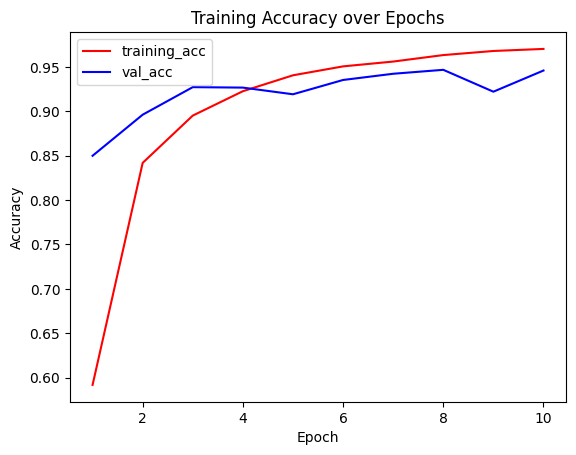

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history['accuracy'],color='red',label='training_acc')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='val_acc')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred=trained_model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 712s 1s/step


(array([[1.27477556e-01, 9.98513028e-03, 2.94502854e-04, ...,
         4.42303502e-07, 5.21446054e-06, 1.19276501e-06],
        [5.23568809e-01, 1.04413107e-01, 1.15896121e-03, ...,
         2.23527415e-04, 9.37142177e-05, 1.83221418e-04],
        [9.74049926e-01, 3.36219021e-03, 1.94910145e-03, ...,
         1.01397836e-06, 2.04380976e-05, 1.99420811e-05],
        ...,
        [3.64266489e-05, 1.12103146e-06, 1.44348131e-04, ...,
         2.63917191e-05, 6.99875363e-06, 9.93656456e-01],
        [9.14892735e-06, 1.09118346e-07, 6.83602366e-06, ...,
         9.15154578e-06, 1.18551668e-06, 9.99688625e-01],
        [3.21769817e-16, 5.20469610e-18, 9.42036756e-15, ...,
         2.86360706e-15, 1.35991622e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([21,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.84      0.90       504
                                 Apple___Black_rot       0.95      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.94      0.95       440
                                   Apple___healthy       0.97      0.84      0.90       502
                               Blueberry___healthy       0.90      0.97      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.95      0.96       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.86      0.89       410
                       Corn_(maize)___Common_rust_       0.95      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [ ]:
cm=confusion_matrix(Y_true, predicted_categories)
cm

array([[421,  14,   3, ...,   0,   3,   0],
       [  0, 489,   0, ...,   0,   0,   0],
       [  0,   0, 413, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   1, ...,   0,   0, 477]])

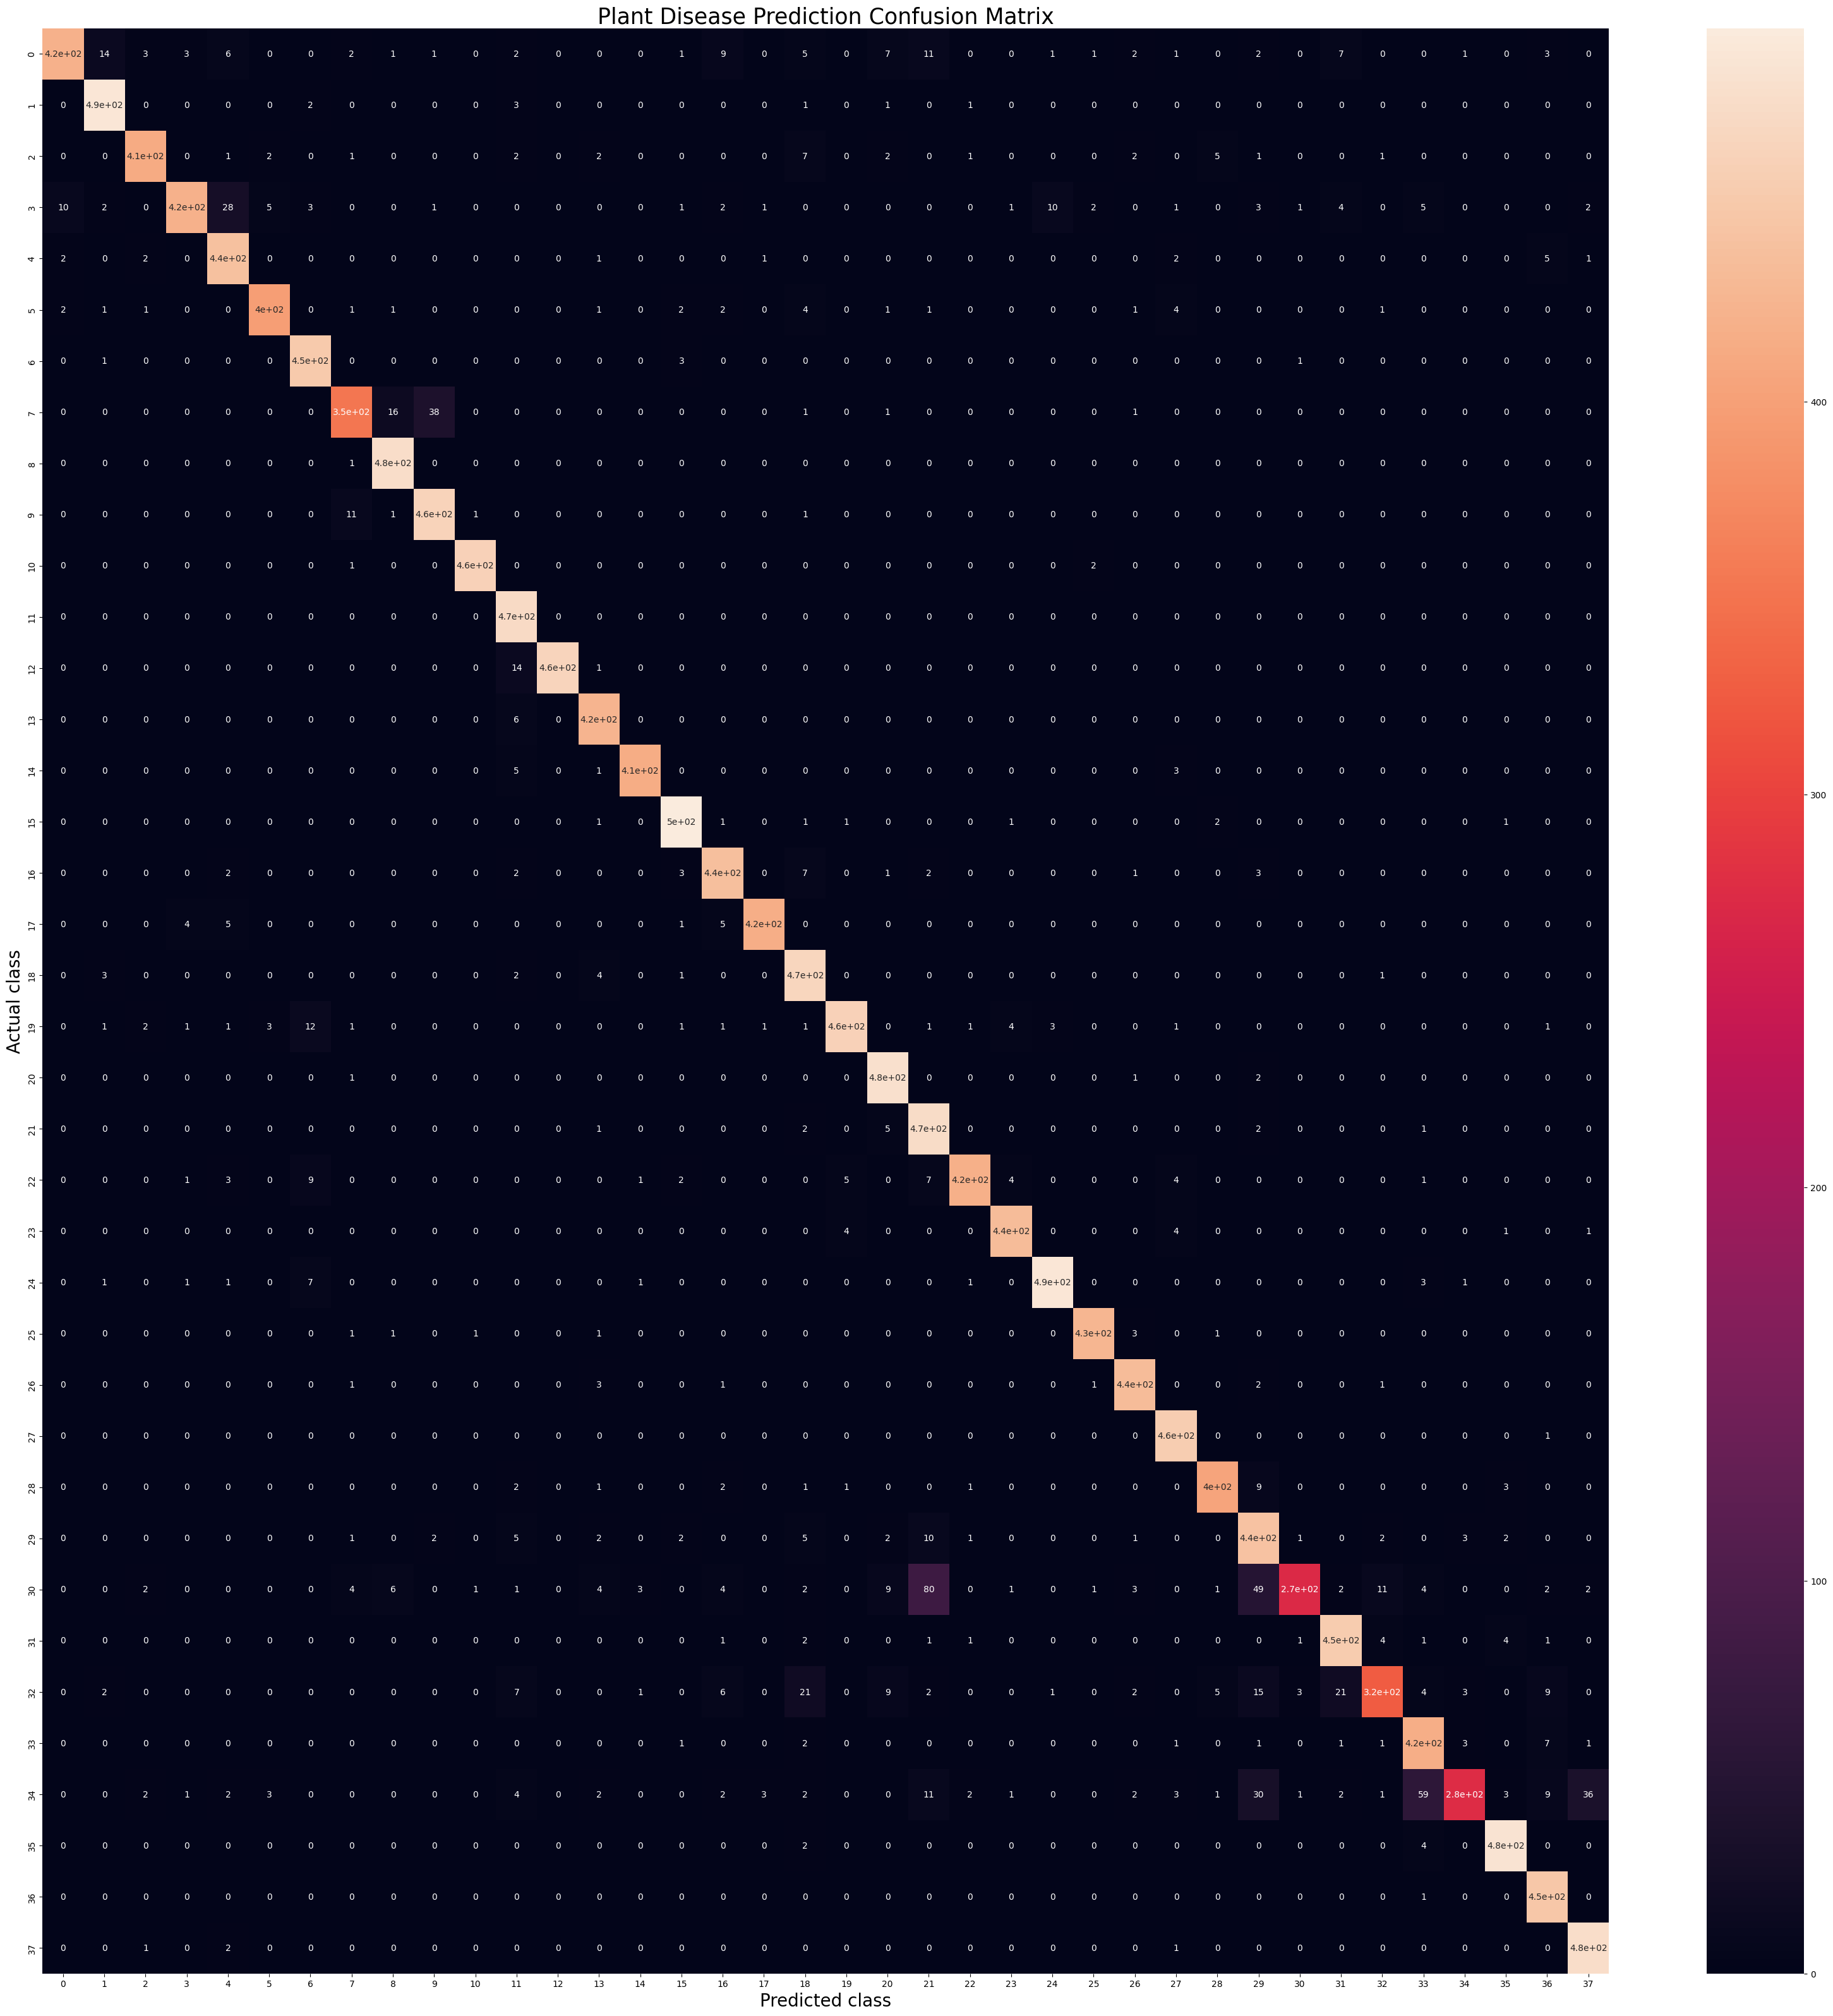

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()